In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
### import the dataset and transform the the image to gray scale images

(X_train, Y_train), (X_test, Y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
import numpy as np

Xtrain=np.empty(shape=(50000,32,32))
Xtest=np.empty(shape=(10000,32,32))
from PIL import Image
for i in range(50000):
  img = Image.fromarray((X_train[i] * 255).astype(np.uint8))
  imgGray = img.convert('L')
  Xtrain[i]=np.asarray(imgGray)

for i in range(10000):
  img = Image.fromarray((X_test[i] * 255).astype(np.uint8))
  imgGray = img.convert('L')
  Xtest[i]=np.asarray(imgGray)



170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
L=[]
for i in range(10):
  l=np.where(Y_train==i)
  L.append(l[0])

l1=np.where(Y_train==0)
l2=np.where(Y_train==1)
l3=np.where(Y_train==2)
l4=np.where(Y_train==3)
l5=np.where(Y_train==4)
l6=np.where(Y_train==5)
l7=np.where(Y_train==6)
l8=np.where(Y_train==7)
l9=np.where(Y_train==8)
l10=np.where(Y_train==9)



In [ ]:
L

[array([   29,    30,    35, ..., 49941, 49992, 49994]),
 array([    4,     5,    32, ..., 49993, 49998, 49999]),
 array([    6,    13,    18, ..., 49987, 49991, 49995]),
 array([    9,    17,    21, ..., 49979, 49982, 49983]),
 array([    3,    10,    20, ..., 49981, 49984, 49990]),
 array([   27,    40,    51, ..., 49964, 49980, 49988]),
 array([    0,    19,    22, ..., 49962, 49966, 49996]),
 array([    7,    11,    12, ..., 49965, 49978, 49986]),
 array([    8,    62,    69, ..., 49968, 49976, 49985]),
 array([    1,     2,    14, ..., 49963, 49971, 49997])]

In [ ]:
from tensorflow.keras.utils import to_categorical
# Set the input shape
feature_vector_length= 32*32
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')
num_classes=10

# Reshape the data - MLPs do not understand such things as '2D'.
# Reshape to 32 x 32 pixels = 1024 features
Xtrain = Xtrain.reshape(Xtrain.shape[0], feature_vector_length)
Xtest = Xtest.reshape(Xtest.shape[0], feature_vector_length)

# change the the type of the data set
Xtrain = Xtrain.astype('float32')
Xtest = Xtest.astype('float32')
X_train /= 255
X_test /= 255

# Convert target classes to categorical ones
Y_train = to_categorical(Y_train, num_classes)
Y_test = to_categorical(Y_test, num_classes)


Feature shape: (1024,)


In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
input = tf.keras.Input(shape=input_shape)
hidden1 = Dense(1024, activation='relu')(input)
output = Dense(10, activation='softmax')(hidden1)

MLP1 = tf.keras.Model(input, output)
MLP1.summary()
Hidden=tf.keras.Model(input,hidden1)
loss = tf.keras.losses.CategoricalCrossentropy()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                                 
Total params: 1,059,850
Trainable params: 1,059,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
MLP1.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
time1=time.time()
history=MLP1.fit(Xtrain, Y_train, epochs=50, batch_size=1000, verbose=1, validation_data=(Xtest,Y_test))
time2=time.time()-time1

Epoch 1/5
50/50 [==============================] - 8s 145ms/step - loss: 2.1347 - accuracy: 0.2058 - val_loss: 2.1010 - val_accuracy: 0.2140
Epoch 2/5
50/50 [==============================] - 5s 103ms/step - loss: 2.0814 - accuracy: 0.2241 - val_loss: 2.1077 - val_accuracy: 0.2081
Epoch 3/5
50/50 [==============================] - 5s 99ms/step - loss: 2.0769 - accuracy: 0.2265 - val_loss: 2.1021 - val_accuracy: 0.2186
Epoch 4/5
50/50 [==============================] - 5s 100ms/step - loss: 2.0759 - accuracy: 0.2240 - val_loss: 2.0954 - val_accuracy: 0.2139
Epoch 5/5
50/50 [==============================] - 5s 99ms/step - loss: 2.0713 - accuracy: 0.2240 - val_loss: 2.0928 - val_accuracy: 0.2144


In [ ]:
time2

41.66899514198303

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


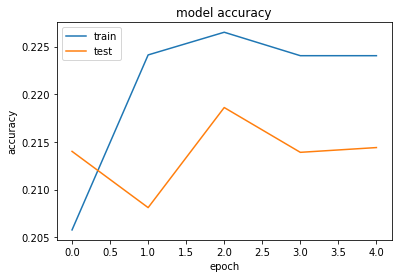

ValueError: ignored

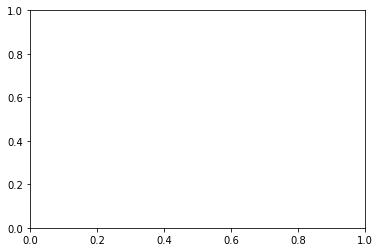

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(range(30,50),history.history['loss'][30:50])
plt.plot(range(30,50),history.history['val_loss'][30:50])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(np.exp(-1*np.array(history.history['loss'])))
plt.plot(np.exp(-1*np.array(history.history['val_loss'])))
plt.title('transfered probability')
plt.ylabel('transfered probability')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




In [ ]:
history.history['accuracy']

In [ ]:
for i in range(10):
  logits= MLP1(Xtrain[L[i]])
  lossvalue=loss(logits,Y_train[L[i]])
  print(np.exp(-lossvalue.numpy()))


1.8231657e-06
1.4127006e-05
1.39994e-06
2.0848863e-06
1.1034334e-06
3.0219303e-06
1.6350592e-06
3.6697413e-06
5.96523e-06
8.8995575e-06


In [ ]:
Y_train[L[0]]
logits= MLP1(Xtrain[L[0]])
print(logits.numpy())

[[0.03077665 0.43386513 0.0112376  ... 0.04473832 0.06940825 0.21727367]
 [0.06783165 0.03110566 0.11659723 ... 0.07755457 0.06795204 0.02056724]
 [0.14093886 0.06988662 0.1274615  ... 0.12761945 0.09421172 0.0775971 ]
 ...
 [0.12747678 0.05315659 0.15630104 ... 0.13230416 0.05712352 0.05038005]
 [0.14608578 0.08210769 0.10601319 ... 0.11985028 0.13040595 0.10222478]
 [0.13035794 0.09481484 0.10069828 ... 0.12048421 0.10746454 0.10020209]]


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain=scaler.transform(Xtrain)
scaler.fit(Xtest)
Xtest=scaler.transform(Xtest)

from numpy import linalg as LA
from numpy import mean
Xnorm=LA.norm(Xtrain, axis=1)
print(Xnorm)
Xnorm=mean(Xnorm)
Xnorm


from sklearn.decomposition import PCA
pca = PCA(n_components=0.99, svd_solver='full')
X=pca.fit_transform(Xtrain,)
print(X.shape)
X_ori=pca.inverse_transform(X)
X_ori


[24.024992 32.364025 39.931084 ... 35.891026 36.117348 28.17051 ]
(50000, 438)


array([[-1.160528  , -1.2812915 , -1.2567952 , ...,  0.68083525,
         0.22880678, -0.33339313],
       [ 0.32610348,  0.0608338 , -0.26928803, ...,  0.33002496,
         0.39525923,  0.4197632 ],
       [ 1.6348237 ,  1.6344247 ,  1.6278718 , ..., -0.7083146 ,
        -0.69389385, -0.7024459 ],
       ...,
       [ 0.12626909,  0.06553104,  0.11837747, ..., -1.2853109 ,
        -1.450967  , -1.5555464 ],
       [ 1.0253321 ,  1.0150337 ,  0.9952373 , ...,  1.0442867 ,
         0.91656226,  0.8154459 ],
       [ 1.3117199 ,  1.4263111 ,  1.4455717 , ...,  0.7251121 ,
         0.72977805,  0.74263066]], dtype=float32)

 ...]

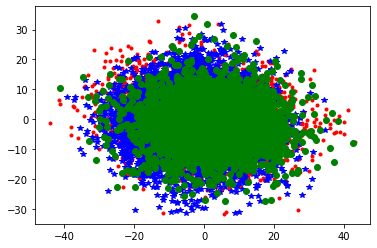

In [ ]:
plt.plot(X[l1,1],X[l1,2], 'r.',X[l2,1],X[l2,2],'b*', X[l3,1],X[l3,2],'go')

In [ ]:
X.shape

(50000, 438)

In [ ]:
import numpy as np
print(mean(np.square(LA.norm(X_ori-Xtrain,axis=1))))
np.sqrt(mean(np.square(LA.norm(X_ori-Xtrain,axis=1))))/Xnorm


10.200581


0.10395702

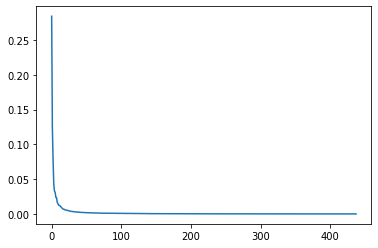

In [ ]:
plt.plot(pca.explained_variance_ratio_)

In [ ]:
X.shape

(50000, 79)

In [ ]:
inputlow = tf.keras.Input(shape=input_shape)
hiddenlow = Dense(79, activation='relu')(inputlow)
outputlow = Dense(10, activation='softmax')(hiddenlow)

MLPlow = tf.keras.Model(inputlow, outputlow)
MLPlow.summary()
Hiddenlow=tf.keras.Model(inputlow,hiddenlow)
loss = tf.keras.losses.CategoricalCrossentropy()


Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_8 (Dense)             (None, 79)                80975     
                                                                 
 dense_9 (Dense)             (None, 10)                800       
                                                                 
Total params: 81,775
Trainable params: 81,775
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
MLPlow.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
time1=time.time()
history=MLPlow.fit(Xtrain, Y_train, epochs=100, batch_size=1000, verbose=1, validation_data=(Xtest,Y_test),callbacks=[model_checkpoint_callback])
time2=time.time()-time1

Epoch 1/8
50/50 [==============================] - 1s 19ms/step - loss: 2.1065 - accuracy: 0.2687 - val_loss: 1.9234 - val_accuracy: 0.3229
Epoch 2/8
50/50 [==============================] - 1s 16ms/step - loss: 1.8497 - accuracy: 0.3493 - val_loss: 1.8339 - val_accuracy: 0.3593
Epoch 3/8
50/50 [==============================] - 1s 15ms/step - loss: 1.7737 - accuracy: 0.3792 - val_loss: 1.7895 - val_accuracy: 0.3759
Epoch 4/8
50/50 [==============================] - 1s 15ms/step - loss: 1.7121 - accuracy: 0.4002 - val_loss: 1.7620 - val_accuracy: 0.3792
Epoch 5/8
50/50 [==============================] - 1s 15ms/step - loss: 1.6691 - accuracy: 0.4161 - val_loss: 1.7392 - val_accuracy: 0.3981
Epoch 6/8
50/50 [==============================] - 1s 15ms/step - loss: 1.6388 - accuracy: 0.4285 - val_loss: 1.7257 - val_accuracy: 0.3980
Epoch 7/8
50/50 [==============================] - 1s 15ms/step - loss: 1.6063 - accuracy: 0.4406 - val_loss: 1.7087 - val_accuracy: 0.4036
Epoch 8/8
50/50 [===

In [ ]:
time2

10.617862462997437

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


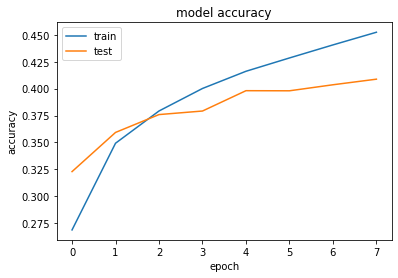

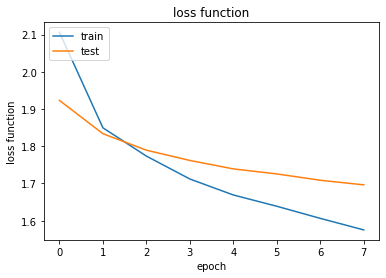

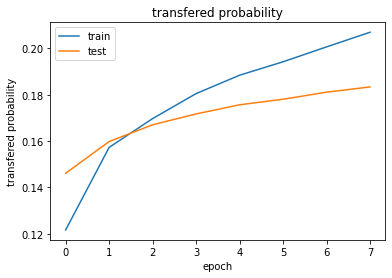

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(np.exp(-1*np.array(history.history['loss'])))
plt.plot(np.exp(-1*np.array(history.history['val_loss'])))
plt.title('transfered probability')
plt.ylabel('transfered probability')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
MLPlow.load_weights(checkpoint_filepath)

In [ ]:
Ytrain= MLPlow(Xtrain)
CMtrain = tf.math.confusion_matrix(np.argmax(Ytrain.numpy(),axis=1),np.argmax(Y_train,axis=1)).numpy()
print(CMtrain/5000)
Ytest=MLPlow(Xtest)
CMtest= tf.math.confusion_matrix(np.argmax(Ytest.numpy(),axis=1),np.argmax(Y_test,axis=1)).numpy()
print(CMtest/1000)



[[0.4712 0.0384 0.0926 0.042  0.0858 0.0338 0.0366 0.0516 0.115  0.039 ]
 [0.0546 0.5914 0.0276 0.0406 0.0338 0.0284 0.0616 0.0232 0.0908 0.1732]
 [0.0802 0.0122 0.366  0.0876 0.1282 0.0984 0.0632 0.064  0.023  0.0216]
 [0.0266 0.0204 0.0676 0.3092 0.0564 0.1474 0.076  0.057  0.022  0.0306]
 [0.0768 0.0326 0.1442 0.087  0.3952 0.0704 0.11   0.084  0.0368 0.0188]
 [0.0236 0.0114 0.0822 0.1638 0.0628 0.3954 0.0698 0.0576 0.026  0.021 ]
 [0.041  0.052  0.0802 0.1078 0.0756 0.0808 0.4754 0.0408 0.0284 0.0326]
 [0.0502 0.0218 0.0704 0.0682 0.0782 0.082  0.0318 0.5558 0.0236 0.0388]
 [0.1298 0.078  0.0362 0.0382 0.0492 0.0302 0.0294 0.02   0.5648 0.0758]
 [0.046  0.1418 0.033  0.0556 0.0348 0.0332 0.0462 0.046  0.0696 0.5486]]
[[0.431 0.047 0.069 0.053 0.087 0.047 0.029 0.059 0.118 0.041]
 [0.046 0.518 0.037 0.044 0.048 0.025 0.075 0.028 0.095 0.226]
 [0.092 0.012 0.339 0.098 0.129 0.117 0.076 0.063 0.018 0.023]
 [0.029 0.026 0.083 0.231 0.07  0.15  0.083 0.079 0.035 0.035]
 [0.079 0.027 0.1

(5000, 60)
(5000, 91)
(5000, 64)
(5000, 63)
(5000, 77)
(5000, 69)
(5000, 102)
(5000, 90)
(5000, 59)
(5000, 101)


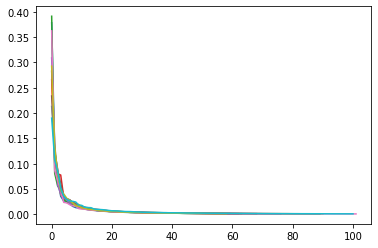

In [ ]:
from sklearn.decomposition import PCA
for i in range(10):
  pca = PCA(n_components=0.90, svd_solver='full')
  X=pca.fit_transform(Xtrain[L[i]],)
  print(X.shape)
  plt.plot(pca.explained_variance_ratio_)


In [ ]:
60+91+64+63+77+69+102+90+59+101

776

In [ ]:
inputhigh = tf.keras.Input(shape=input_shape)
hiddenhigh = Dense(776, activation='relu')(inputhigh)
outputhigh = Dense(10, activation='softmax')(hiddenhigh)

MLPhigh = tf.keras.Model(inputhigh, outputhigh)
MLPhigh.summary()
Hiddenhigh=tf.keras.Model(inputhigh,hiddenhigh)
loss = tf.keras.losses.CategoricalCrossentropy()


Model: "model_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 1024)]            0         
                                                                 
 dense_16 (Dense)            (None, 776)               795400    
                                                                 
 dense_17 (Dense)            (None, 10)                7770      
                                                                 
Total params: 803,170
Trainable params: 803,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_filepath1 = '/tmp/checkpoint1'
model_checkpoint_callback1 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath1,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
MLPhigh.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
time1=time.time()
history=MLPhigh.fit(Xtrain, Y_train, epochs=150, batch_size=100, verbose=1, validation_data=(Xtest,Y_test),callbacks=[model_checkpoint_callback1])
time2=time.time()-time1

Epoch 1/50
500/500 [==============================] - 11s 21ms/step - loss: 2.0211 - accuracy: 0.3303 - val_loss: 1.7631 - val_accuracy: 0.3824
Epoch 2/50
500/500 [==============================] - 7s 13ms/step - loss: 1.6820 - accuracy: 0.4195 - val_loss: 1.7729 - val_accuracy: 0.3818
Epoch 3/50
500/500 [==============================] - 7s 14ms/step - loss: 1.5863 - accuracy: 0.4526 - val_loss: 1.6861 - val_accuracy: 0.4230
Epoch 4/50
500/500 [==============================] - 7s 13ms/step - loss: 1.5183 - accuracy: 0.4762 - val_loss: 1.7698 - val_accuracy: 0.4048
Epoch 5/50
500/500 [==============================] - 7s 13ms/step - loss: 1.4632 - accuracy: 0.4953 - val_loss: 1.6929 - val_accuracy: 0.4236
Epoch 6/50
500/500 [==============================] - 7s 14ms/step - loss: 1.4037 - accuracy: 0.5165 - val_loss: 1.7095 - val_accuracy: 0.4255
Epoch 7/50
500/500 [==============================] - 7s 13ms/step - loss: 1.3495 - accuracy: 0.5372 - val_loss: 1.6881 - val_accuracy: 0.439

In [ ]:
time2

41.67990255355835

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


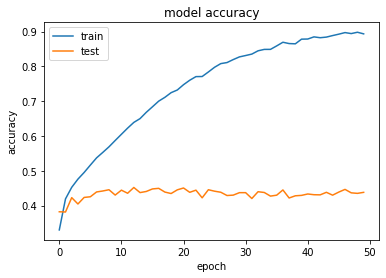

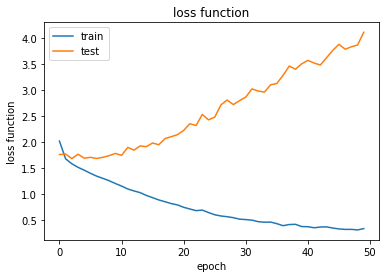

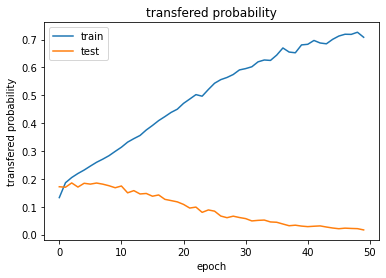

In [ ]:
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(np.exp(-1*np.array(history.history['loss'])))
plt.plot(np.exp(-1*np.array(history.history['val_loss'])))
plt.title('transfered probability')
plt.ylabel('transfered probability')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


NameError: ignored

In [ ]:
Hiddenhigh.load_weights(checkpoint_filepath1)
Ztrain=Hiddenhigh(Xtrain).numpy()
Ztest=Hiddenhigh(Xtest).numpy()
pca = PCA(n_components=0.95, svd_solver='full')
Z=pca.fit_transform(Ztrain,)
print(Z.shape)


(50000, 446)


In [ ]:
Z_ori=pca.inverse_transform(Z)
Z_ori

array([[ 0.5093925 ,  2.196933  ,  0.43605256, ...,  0.26611412,
         2.3349907 ,  0.33363283],
       [ 0.97276545,  2.0105295 ,  0.6427808 , ..., -0.61627674,
         0.92432857,  0.46669233],
       [ 0.9750508 , -0.10347903,  4.987162  , ...,  0.14697313,
         0.06746337, -0.4145167 ],
       ...,
       [-0.46589515,  0.2532122 , 10.805473  , ...,  0.6532421 ,
         0.08555219,  2.3226368 ],
       [-0.22233203, -0.06563967,  0.15607452, ...,  0.97866565,
         1.7786492 ,  0.14983988],
       [ 0.45775923,  0.76937044, -0.65567255, ...,  1.6471362 ,
         0.43570495,  5.449432  ]], dtype=float32)

In [ ]:
Znorm=LA.norm(Ztrain, axis=1)
print(Znorm)
Znorm=mean(Znorm)
Znorm
print(mean(np.square(LA.norm(Z_ori-Ztrain,axis=1))))
np.sqrt(mean(np.square(LA.norm(Z_ori-Ztrain,axis=1))))/Znorm



[49.39302  74.11921  70.89166  ... 66.81949  73.45117  58.793556]
129.30443


0.20091024

In [ ]:
auto_input = tf.keras.Input(shape=(776,))
encoder = Dense(461, activation='relu')(auto_input)
decoder = Dense(776, activation='linear')(encoder)

Autoencoder = tf.keras.Model(auto_input, decoder)
Encoder=tf.keras.Model(auto_input,encoder)

# Configure the model and start training
Autoencoder.compile(loss='mse', optimizer='adam', metrics=['mse'])
time1=time.time()
history1= Autoencoder.fit(Ztrain, Ztrain, epochs=100, batch_size=500, verbose=1, validation_data=(Ztest,Ztest))
time2=time.time()-time1

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


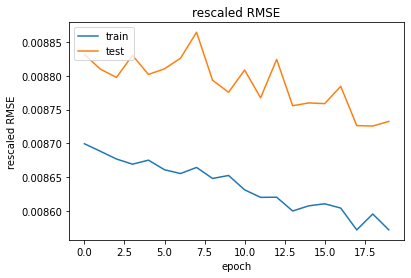

In [ ]:
print(history1.history.keys())

plt.plot(np.sqrt(np.array(history1.history['loss'][80:200]))/Znorm)
plt.plot(np.sqrt(np.array(history1.history['val_loss'][80:200]))/Znorm)


plt.title('rescaled RMSE')
plt.ylabel('rescaled RMSE')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



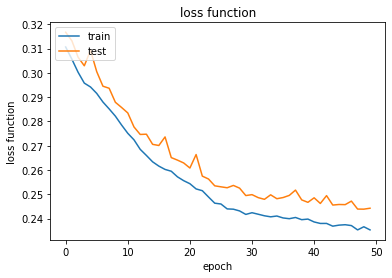

In [ ]:
plt.plot(history1.history['loss'][50:200])
plt.plot(history1.history['val_loss'][50:200])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
Ktrain=Encoder(Ztrain).numpy()
Ktest=Encoder(Ztest).numpy()


In [ ]:
print(Ktest.shape)
pca = PCA(n_components=0.99, svd_solver='full')
K=pca.fit_transform(Ktrain,)
print(K.shape)



(10000, 461)
(50000, 359)


In [ ]:
inputlong = tf.keras.Input(shape=461)
hiddenlong = Dense(175, activation='relu')(inputlong)
outputlong = Dense(10, activation='softmax')(hiddenlong)

MLPlong = tf.keras.Model(inputlong, outputlong)
MLPlong.summary()
Hiddenlong=tf.keras.Model(inputlong,hiddenlong)
loss = tf.keras.losses.CategoricalCrossentropy()


Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 461)]             0         
                                                                 
 dense_24 (Dense)            (None, 175)               80850     
                                                                 
 dense_25 (Dense)            (None, 10)                1760      
                                                                 
Total params: 82,610
Trainable params: 82,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
checkpoint_filepath2 = '/tmp/checkpoint2'
model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath2,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [ ]:
MLPlong.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
time1=time.time()
history=MLPlong.fit(Ktrain, Y_train, epochs=150, batch_size=500, verbose=1, validation_data=(Ktest,Y_test),callbacks=[model_checkpoint_callback2])
time2=time.time()-time1

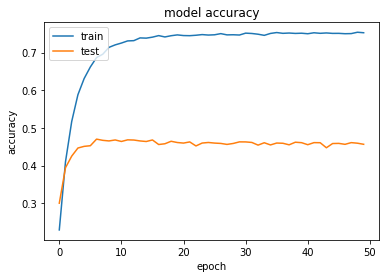

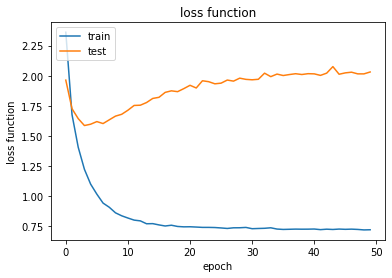

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('loss function')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [ ]:
time2

49.69844341278076

In [ ]:
from sklearn.metrics import accuracy_score
MLPlong.load_weights(checkpoint_filepath2)
Ytrain= MLPlong(Ktrain)
CMtrain = tf.math.confusion_matrix(np.argmax(Ytrain.numpy(),axis=1),np.argmax(Y_train,axis=1)).numpy()

print(accuracy_score(np.argmax(Ytrain.numpy(),axis=1),np.argmax(Y_train,axis=1)))
print(CMtrain/5000)
Ytest=MLPlong(Ktest)
CMtest= tf.math.confusion_matrix(np.argmax(Ytest.numpy(),axis=1),np.argmax(Y_test,axis=1)).numpy()
print(accuracy_score(np.argmax(Ytest.numpy(),axis=1),np.argmax(Y_test,axis=1)))
print(CMtest/1000)



0.62172
[[0.6534 0.034  0.1202 0.0332 0.0826 0.0268 0.0298 0.0322 0.106  0.0358]
 [0.0332 0.7716 0.017  0.0234 0.024  0.0148 0.0364 0.0122 0.0602 0.105 ]
 [0.0732 0.0046 0.4844 0.071  0.1688 0.0696 0.0428 0.03   0.0152 0.005 ]
 [0.0162 0.0102 0.0998 0.5328 0.111  0.1966 0.0686 0.0708 0.0206 0.0222]
 [0.0166 0.0058 0.07   0.0496 0.351  0.0354 0.027  0.03   0.0092 0.0066]
 [0.0084 0.002  0.0656 0.0968 0.0426 0.5022 0.0172 0.0538 0.0044 0.0078]
 [0.0224 0.0262 0.0634 0.0812 0.09   0.058  0.7332 0.0118 0.0126 0.0154]
 [0.0104 0.0066 0.0216 0.0384 0.0526 0.0556 0.0036 0.7176 0.0022 0.0126]
 [0.1322 0.0618 0.0362 0.0302 0.0462 0.0188 0.0148 0.0132 0.7342 0.0528]
 [0.034  0.0772 0.0218 0.0434 0.0312 0.0222 0.0266 0.0284 0.0354 0.7368]]
0.4465
[[0.516 0.046 0.116 0.064 0.103 0.053 0.046 0.047 0.141 0.051]
 [0.037 0.562 0.031 0.042 0.027 0.017 0.07  0.028 0.087 0.189]
 [0.098 0.004 0.366 0.094 0.162 0.085 0.084 0.051 0.021 0.014]
 [0.023 0.025 0.128 0.322 0.107 0.251 0.118 0.095 0.039 0.045]
 [

In [ ]:
### multiple MLP
MLPlist=[]
Acclist=[]
for i in range(10):
  inputlong = tf.keras.Input(shape=461)
  hiddenlong = Dense(175, activation='relu')(inputlong)
  outputlong = Dense(10, activation='softmax')(hiddenlong)

  MLPlong = tf.keras.Model(inputlong, outputlong)

  Hiddenlong=tf.keras.Model(inputlong,hiddenlong)
  loss = tf.keras.losses.CategoricalCrossentropy()

  
  checkpoint_filepath = '/tmp/checkpoint'
  model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
  MLPlong.compile(loss=loss, optimizer='adam', metrics=['accuracy'])
  history=MLPlong.fit(Ktrain, Y_train, epochs=20, batch_size=1000, verbose=1, validation_split=0.2,callbacks=[model_checkpoint_callback])
  MLPlong.load_weights(checkpoint_filepath)
  Acclist.append(accuracy_score(np.argmax(Ytest.numpy(),axis=1),np.argmax(Y_test,axis=1)))
  MLPlist.append(MLPlong)

Epoch 1/20
40/40 [==============================] - 2s 31ms/step - loss: 2.8751 - accuracy: 0.1608 - val_loss: 2.3083 - val_accuracy: 0.2169
Epoch 2/20
40/40 [==============================] - 1s 24ms/step - loss: 2.0886 - accuracy: 0.2731 - val_loss: 1.9228 - val_accuracy: 0.3253
Epoch 3/20
40/40 [==============================] - 1s 25ms/step - loss: 1.7850 - accuracy: 0.3743 - val_loss: 1.6803 - val_accuracy: 0.4099
Epoch 4/20
40/40 [==============================] - 1s 20ms/step - loss: 1.5657 - accuracy: 0.4518 - val_loss: 1.4933 - val_accuracy: 0.4864
Epoch 5/20
40/40 [==============================] - 1s 23ms/step - loss: 1.4041 - accuracy: 0.5121 - val_loss: 1.3724 - val_accuracy: 0.5310
Epoch 6/20
40/40 [==============================] - 1s 25ms/step - loss: 1.2802 - accuracy: 0.5605 - val_loss: 1.2447 - val_accuracy: 0.5780
Epoch 7/20
40/40 [==============================] - 1s 23ms/step - loss: 1.1818 - accuracy: 0.5977 - val_loss: 1.1703 - val_accuracy: 0.6055
Epoch 8/20
40

In [ ]:
acclist=[]
ytest1=np.zeros((10000,10))
for i in range(10):
  ytest=MLPlist[i](Ktest)
  ytest=to_categorical(np.argmax(ytest.numpy(),axis=1),10)
  ytest1=ytest1+ytest
  acclist.append(accuracy_score(np.argmax(ytest,axis=1),np.argmax(Y_test,axis=1)))

accuracy_score(np.argmax(ytest1,axis=1),np.argmax(Y_test,axis=1))

0.4711